In [3]:
import random
import numpy as np
from player import Player
from action import Action
from action_validator import ActionValidator
import config
import matplotlib
import json
from collections import Counter
import pandas as pd


In [4]:
def display_stats():
    """
    Loads the simulated hands data from the JSON file and generates visualizations:
    1. Number of Hands Won per Player (bar chart using seaborn)
    2. Chip Counts Over Time per Player (line chart using seaborn)
    3. Cumulative Hands Won Over Time (line chart using seaborn)
    4. Card Win Rates (bar chart using seaborn)
    5. Average Big Blinds Won per Hand between Players (bar chart using seaborn)
    
    Additionally, it prints descriptive statistics for:
    - Chip counts over time
    - Net chip change per hand (chips)
    - Average Big Blinds per Hand per player
    """
    import json
    import matplotlib.pyplot as plt
    import seaborn as sns
    from collections import Counter
    import pandas as pd

    try:
        with open('../hands.json', 'r') as f:
            hands_data = json.load(f)
        print("Loaded 'hands.json' successfully.")
    except FileNotFoundError:
        print("Error: 'hands.json' not found. Please run the simulation first.")
        return

    win_counts = Counter()
    chip_history = {}  
    card_counter = Counter()
    player_names = set()

    # Process each hand in the simulation
    for hand in hands_data:
        players = hand.get('players', [])
        for player in players:
            name = player['name']
            chips = player['chips']
            player_names.add(name)
            if name not in chip_history:
                chip_history[name] = []
            chip_history[name].append(chips)

        winners = hand.get('winners', [])
        for winner in winners:
            win_counts[winner] += 1
            for player in players:
                if player['name'] == winner:
                    hand_cards = [card['rank'] for card in player['hand']]
                    card_counter.update(hand_cards)
                    break

    chip_df = pd.DataFrame(chip_history)
    chip_df.index.name = 'Hand Number'
    chip_df.reset_index(inplace=True)
    chip_df['Hand Number'] += 1  

    win_counts_df = pd.DataFrame(win_counts.items(), columns=['Player', 'Hands Won'])
    win_counts_df = win_counts_df.sort_values(by='Hands Won', ascending=False)

    cards_df = pd.DataFrame(card_counter.items(), columns=['Card', 'Wins'])
    cards_df = cards_df.sort_values(by='Wins', ascending=False)

    sns.set(style="whitegrid")

    # Graph 1: Number of Hands Won per Player (Bar Chart)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Player', y='Hands Won', data=win_counts_df, palette='viridis')
    plt.title('Number of Hands Won per Player')
    plt.xlabel('Player')
    plt.ylabel('Hands Won')
    plt.tight_layout()
    plt.show()

    # Graph 2: Chip Counts Over Time per Player (Line Chart)
    chip_df_melted = chip_df.melt(id_vars=['Hand Number'], var_name='Player', value_name='Chips')
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Hand Number', y='Chips', hue='Player', data=chip_df_melted)
    plt.title('Chip Counts Over Time')
    plt.xlabel('Hand Number')
    plt.ylabel('Chips')
    plt.legend(title='Player')
    plt.tight_layout()
    plt.show()

    # Graph 3: Cumulative Hands Won Over Time (Line Chart)
    cumulative_wins = {player: [] for player in player_names}
    wins_running = {player: 0 for player in player_names}
    hand_numbers = range(1, len(hands_data) + 1)
    
    for hand in hands_data:
        winners = hand.get('winners', [])
        for player in player_names:
            if player in winners:
                wins_running[player] += 1
            cumulative_wins[player].append(wins_running[player])
    
    cumulative_wins_df = pd.DataFrame(cumulative_wins, index=hand_numbers)
    cumulative_wins_df.index.name = 'Hand Number'
    cumulative_wins_reset = cumulative_wins_df.reset_index().melt(id_vars=['Hand Number'], 
                                                                  var_name='Player', 
                                                                  value_name='Cumulative Wins')
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Hand Number', y='Cumulative Wins', hue='Player', data=cumulative_wins_reset)
    plt.title('Cumulative Hands Won Over Time')
    plt.xlabel('Hand Number')
    plt.ylabel('Cumulative Wins')
    plt.legend(title='Player')
    plt.tight_layout()
    plt.show()

    # Graph 4: Card Win Rates (Bar Chart)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Card', y='Wins', data=cards_df, palette='coolwarm')
    plt.title('Card Ranks in Winning Hands')
    plt.xlabel('Card Rank')
    plt.ylabel('Number of Wins')
    plt.tight_layout()
    plt.show()

    # Graph 5: Average Big Blinds (bbs) Won per Hand between Players
    big_blind = 10  # Use the big blind value from your TexasHoldem game configuration
    chip_df_for_diff = chip_df.copy()
    chip_df_for_diff.set_index('Hand Number', inplace=True)
    chip_diff = chip_df_for_diff.diff().dropna()  
    avg_chip_gain = chip_diff.mean()  
    avg_bbs = avg_chip_gain / big_blind  
    avg_bbs_df = pd.DataFrame({'Player': avg_bbs.index, 'Avg BBS per Hand': avg_bbs.values})
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Player', y='Avg BBS per Hand', data=avg_bbs_df, palette='plasma')
    plt.title('Average Big Blinds Won per Hand')
    plt.xlabel('Player')
    plt.ylabel('Avg BBS per Hand')
    plt.tight_layout()
    plt.show()

    print("Descriptive Statistics for Chip Counts Over Time:")
    print(chip_df.describe())
    
    print("\nDescriptive Statistics for Net Chip Change per Hand (in chips):")
    print(chip_diff.describe())
    
    print("\nAverage Big Blinds Won per Hand (for each player):")
    print(avg_bbs_df)
    
    print("\nVisualizations and descriptive statistics generated successfully.")


Loaded 'hands.json' successfully.


C:\Users\felulind\AppData\Local\Temp\ipykernel_28428\1491019629.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='Hands Won', data=win_counts_df, palette='viridis')


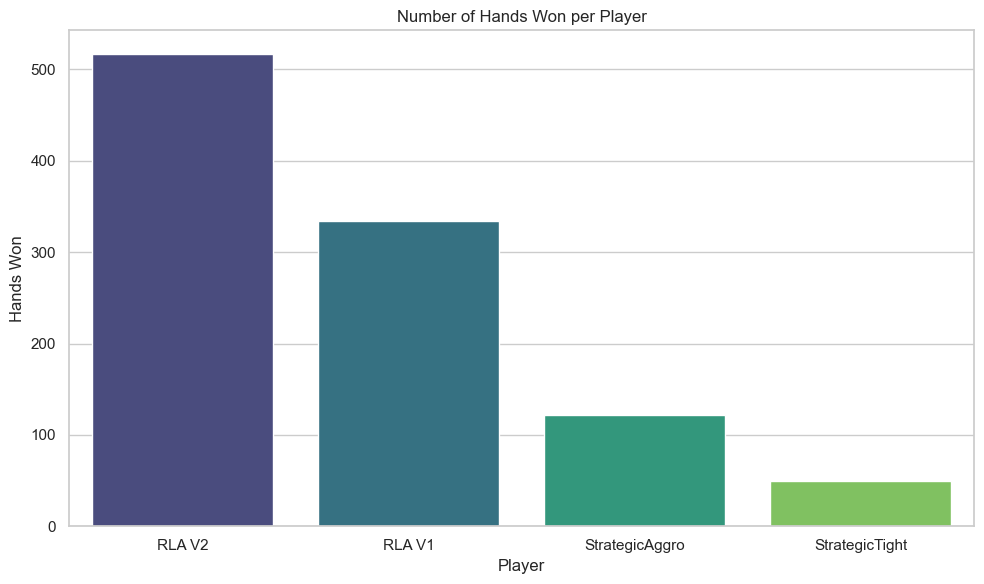

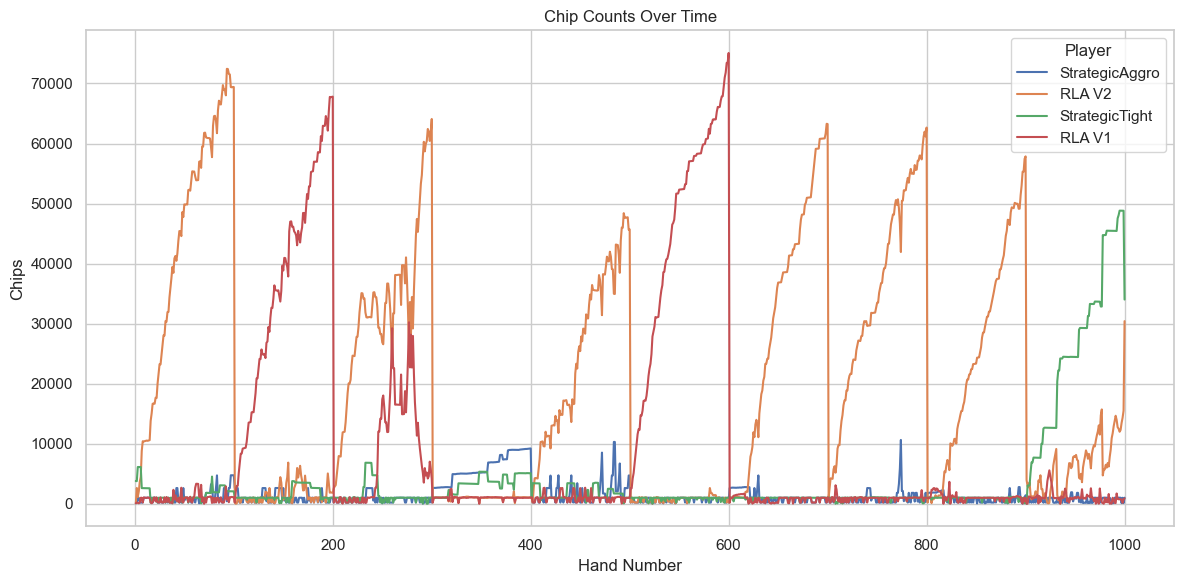

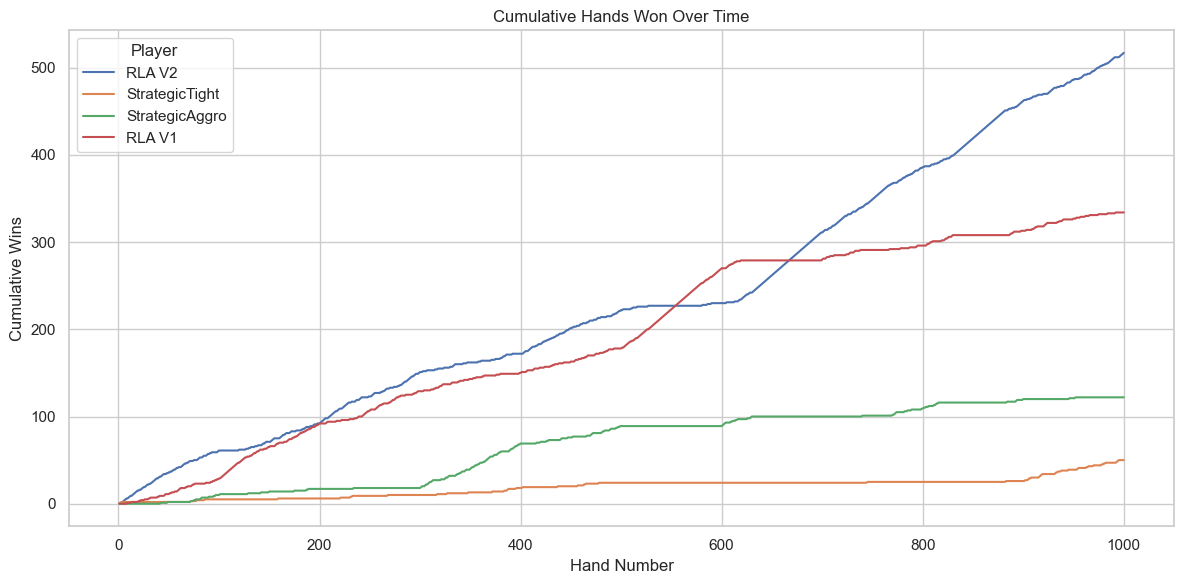

C:\Users\felulind\AppData\Local\Temp\ipykernel_28428\1491019629.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Card', y='Wins', data=cards_df, palette='coolwarm')


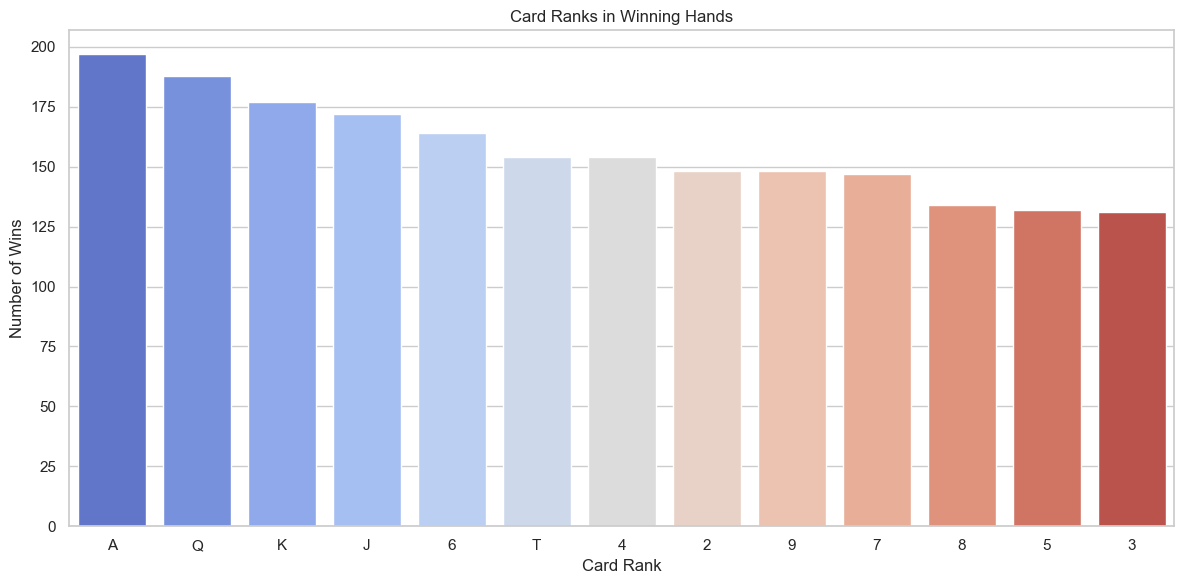

C:\Users\felulind\AppData\Local\Temp\ipykernel_28428\1491019629.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='Avg BBS per Hand', data=avg_bbs_df, palette='plasma')


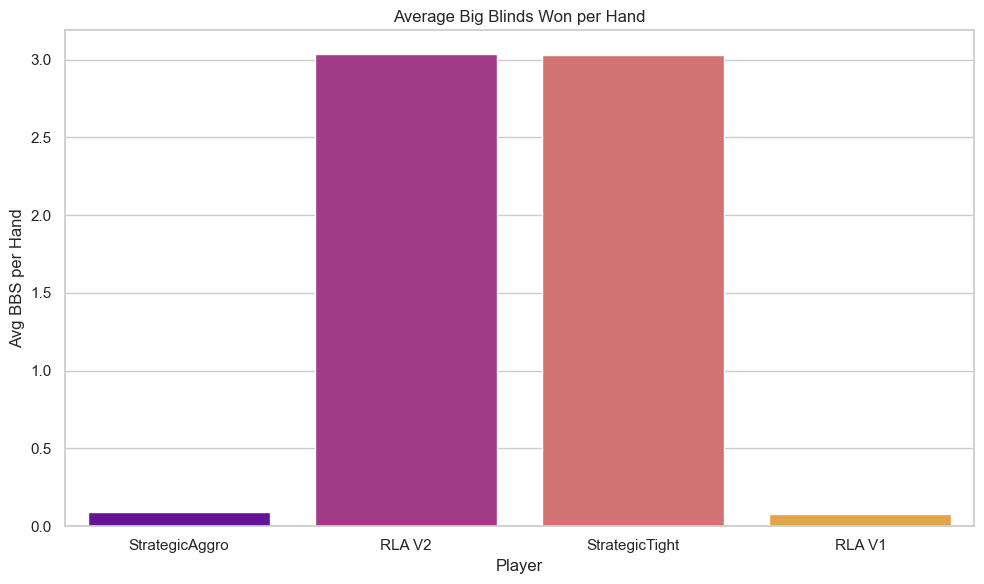

Descriptive Statistics for Chip Counts Over Time:
       Hand Number  StrategicAggro        RLA V2  StrategicTight        RLA V1
count  1000.000000     1000.000000   1000.000000     1000.000000   1000.000000
mean    500.500000     1499.708596  20245.366447     3968.698152   9694.799082
std     288.819436     1949.246555  20690.278602     8721.357082  18288.152259
min       1.000000       16.600000      0.000000        0.000000      0.000000
25%     250.750000      196.000000   1055.000000      990.000000    960.000000
50%     500.500000      995.000000  11988.012592     1000.000000   1015.000000
75%     750.250000     1000.000000  36714.686680     2593.750596   4187.169464
max    1000.000000    10621.688000  72447.267978    48817.682068  75088.686142

Descriptive Statistics for Net Chip Change per Hand (in chips):
       StrategicAggro        RLA V2  StrategicTight        RLA V1
count      999.000000    999.000000      999.000000    999.000000
mean         0.924525     30.364890       

In [5]:
display_stats()